In [2]:
! cp -r /content/drive/My\ Drive/machine_learning/ /content

In [1]:
import os
os.chdir("/content/machine_learning")

In [2]:
import cnn_models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from model_utils import ModelUtils, ModelAnalytics
from data_loader import FeatureDataset

plt.style.use('default')
drive_dir = "/content/drive/My Drive/machine_learning"
pth_dir = f"{drive_dir}/pths"
loss_dir = f"{drive_dir}/losses"

In [3]:
train_dataset = FeatureDataset("cqt", "train")
validate_dataset = FeatureDataset("cqt", "validate")
test_dataset = FeatureDataset("cqt", "test")

criterion = nn.CrossEntropyLoss()

In [4]:
model = cnn_models.CQTCNNFreq().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [5]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_freq_cqt/epoch_0.pth
1min 27.1s, EPOCH 5/50, Loss: 338.68, Total time: 87.092, Transfer time: 3.459, Train time: 20.863
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_freq_cqt/epoch_5.pth
2min 0.8s, EPOCH 10/50, Loss: 313.84, Total time: 33.614, Transfer time: 3.375, Train time: 20.426
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_freq_cqt/epoch_10.pth
2min 34.4s, EPOCH 15/50, Loss: 295.19, Total time: 33.633, Transfer time: 3.38, Train time: 20.43
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_freq_cqt/epoch_15.pth
3min 7.9s, EPOCH 20/50, Loss: 279.9, Total time: 33.487, Transfer time: 3.356, Train time: 20.418
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_freq_cqt/epoch_20.pth
3min 41.6s, EPOCH 25/50, Loss: 269.97, Total time: 33.61, Transfer time: 3.383, Train time: 20.429
Saved model state as /co

Evaluating pths for epochs:  0 (0min 22.3s), 5 (0min 26.4s), 10 (0min 30.5s), 15 (0min 34.7s), 20 (0min 38.8s), 25 (0min 43.0s), 30 (0min 47.1s), 35 (0min 51.2s), 40 (0min 55.3s), 45 (0min 59.5s), 50 (1min 3.6s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.7804 at epoch 50
Maximum validate accuracy: 0.4988 at epoch 35
Maximum test accuracy: 0.455 at epoch 25

AT EPOCH 25
Macro Test AUC: 0.7786, Accuracy: 0.455

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.8065, Accuracy of 0.64
 - Experimental: AUC of 0.6978, Accuracy of 0.27
 - Folk: AUC of 0.7376, Accuracy of 0.3
 - Hip-Hop: AUC of 0.9293, Accuracy of 0.72
 - Instrumental: AUC of 0.8092, Accuracy of 0.27
 - International: AUC of 0.7685, Accuracy of 0.52
 - Pop: AUC of 0.5673, Accuracy of 0.31
 - Rock: AUC of 0.9039, Accuracy of 0.61


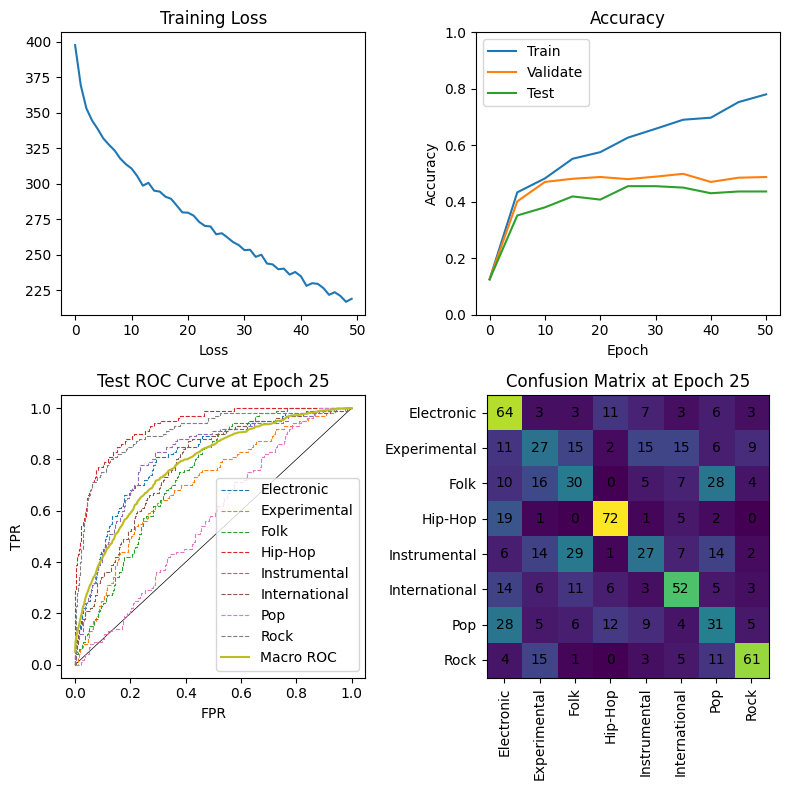

In [6]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)

In [7]:
model = cnn_models.CQTCNNTemporal().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [8]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_temporal_cqt/epoch_0.pth
0min 19.4s, EPOCH 5/50, Loss: 339.93, Total time: 19.357, Transfer time: 3.398, Train time: 6.525
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_temporal_cqt/epoch_5.pth
0min 38.7s, EPOCH 10/50, Loss: 316.27, Total time: 19.289, Transfer time: 3.373, Train time: 6.503
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_temporal_cqt/epoch_10.pth
0min 58.0s, EPOCH 15/50, Loss: 292.89, Total time: 19.264, Transfer time: 3.368, Train time: 6.501
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_temporal_cqt/epoch_15.pth
1min 17.3s, EPOCH 20/50, Loss: 271.06, Total time: 19.325, Transfer time: 3.391, Train time: 6.495
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_temporal_cqt/epoch_20.pth
1min 36.7s, EPOCH 25/50, Loss: 245.79, Total time: 19.335, Transfer time: 3.395, Train time: 6.505
Sav

Evaluating pths for epochs:  0 (0min 3.3s), 5 (0min 6.6s), 10 (0min 9.8s), 15 (0min 13.0s), 20 (0min 16.3s), 25 (0min 19.6s), 30 (0min 22.8s), 35 (0min 26.1s), 40 (0min 29.3s), 45 (0min 32.5s), 50 (0min 35.7s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.8672 at epoch 50
Maximum validate accuracy: 0.4688 at epoch 20
Maximum test accuracy: 0.405 at epoch 20

AT EPOCH 20
Macro Test AUC: 0.7618, Accuracy: 0.405

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.781, Accuracy of 0.43
 - Experimental: AUC of 0.6174, Accuracy of 0.15
 - Folk: AUC of 0.7402, Accuracy of 0.41
 - Hip-Hop: AUC of 0.9249, Accuracy of 0.84
 - Instrumental: AUC of 0.803, Accuracy of 0.36
 - International: AUC of 0.8241, Accuracy of 0.54
 - Pop: AUC of 0.5512, Accuracy of 0.06
 - Rock: AUC of 0.8443, Accuracy of 0.45


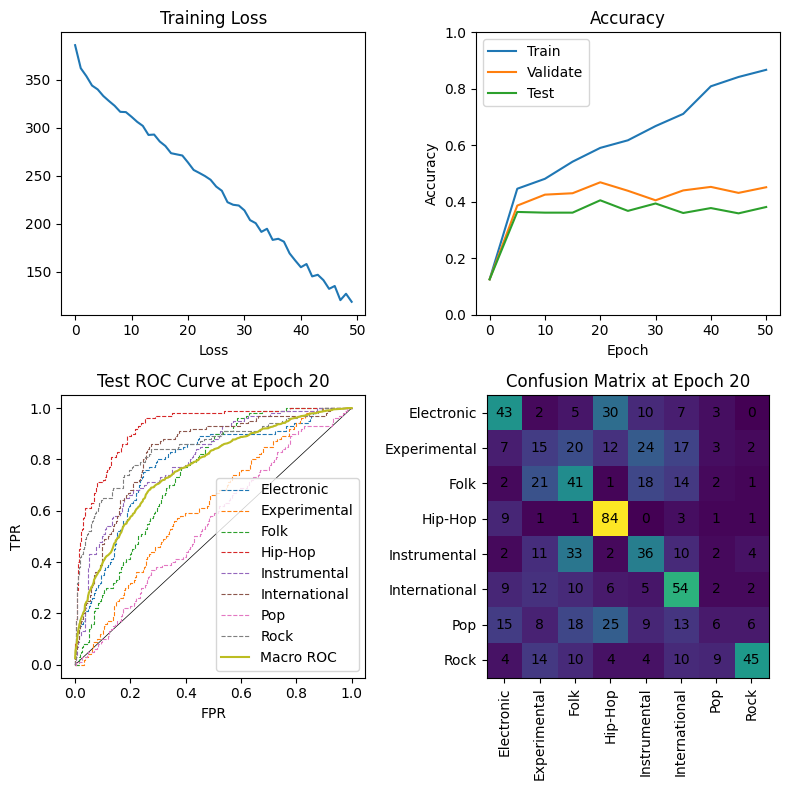

In [9]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)

In [10]:
model = cnn_models.CQTCNNSquare().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [11]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_square_cqt/epoch_0.pth
0min 29.1s, EPOCH 5/50, Loss: 350.85, Total time: 29.036, Transfer time: 3.349, Train time: 15.676
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_square_cqt/epoch_5.pth
0min 58.1s, EPOCH 10/50, Loss: 329.51, Total time: 28.99, Transfer time: 3.34, Train time: 15.673
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_square_cqt/epoch_10.pth
1min 27.1s, EPOCH 15/50, Loss: 310.86, Total time: 29.042, Transfer time: 3.36, Train time: 15.671
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_square_cqt/epoch_15.pth
1min 56.2s, EPOCH 20/50, Loss: 293.63, Total time: 29.032, Transfer time: 3.347, Train time: 15.671
Saved model state as /content/drive/My Drive/machine_learning/pths/cqt_cnn_square_cqt/epoch_20.pth
2min 25.2s, EPOCH 25/50, Loss: 268.33, Total time: 29.007, Transfer time: 3.34, Train time: 15.671
Saved model 

Evaluating pths for epochs:  0 (0min 3.9s), 5 (0min 7.9s), 10 (0min 11.9s), 15 (0min 15.9s), 20 (0min 19.7s), 25 (0min 23.6s), 30 (0min 27.4s), 35 (0min 31.2s), 40 (0min 35.1s), 45 (0min 38.9s), 50 (0min 42.8s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.8426 at epoch 50
Maximum validate accuracy: 0.5088 at epoch 45
Maximum test accuracy: 0.4363 at epoch 25

AT EPOCH 25
Macro Test AUC: 0.7677, Accuracy: 0.4363

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.7833, Accuracy of 0.39
 - Experimental: AUC of 0.6924, Accuracy of 0.21
 - Folk: AUC of 0.7604, Accuracy of 0.39
 - Hip-Hop: AUC of 0.9379, Accuracy of 0.74
 - Instrumental: AUC of 0.8088, Accuracy of 0.23
 - International: AUC of 0.7872, Accuracy of 0.7
 - Pop: AUC of 0.4849, Accuracy of 0.22
 - Rock: AUC of 0.8781, Accuracy of 0.61


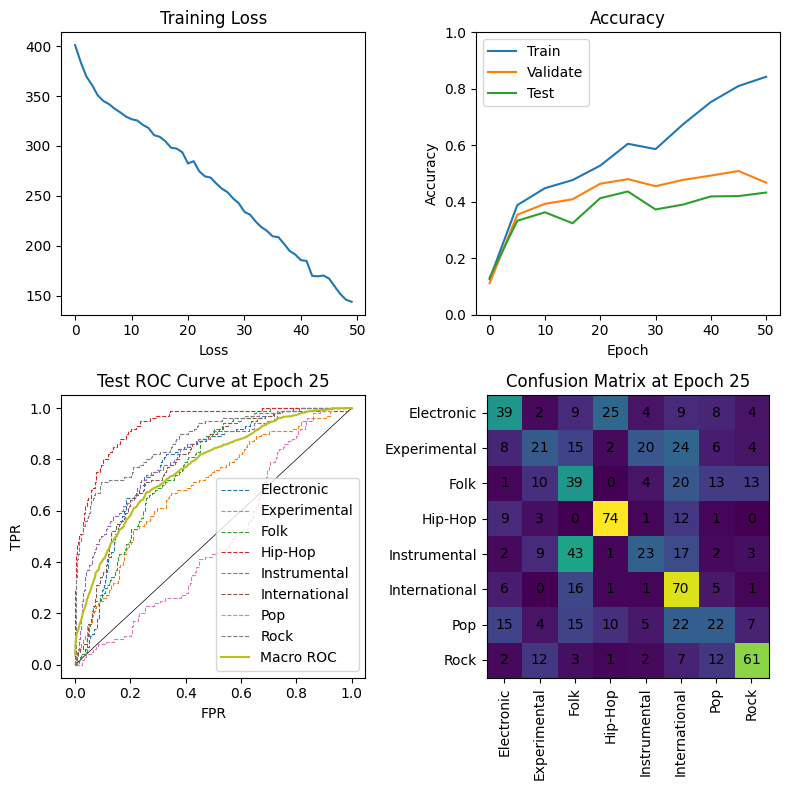

In [12]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)